# Model skill assessment

## Simple comparison

Sometimes all your need is a simple comparison of two time series. The `modelskill.compare()` method does just that.

In [2]:
from mikeio import Dfs0
import modelskill

### The model
Can be either a dfs0 or a DataFrame.  

In [3]:
fn_mod = 'data/SW/ts_storm_4.dfs0'
df_mod = Dfs0(fn_mod).read(items=0).to_dataframe()

### The observation
Can be either a dfs0, a DataFrame or a PointObservation object. 

In [4]:
fn_obs = 'data/SW/eur_Hm0.dfs0'

### compare()
The compare() method will return an object that can be used for scatter plots, skill assessment, time series plots etc.

In [5]:
c = modelskill.compare(fn_obs, df_mod)

<Axes: title={'center': 'eur_Hm0'}, xlabel='time', ylabel='Significant wave height [meter]'>

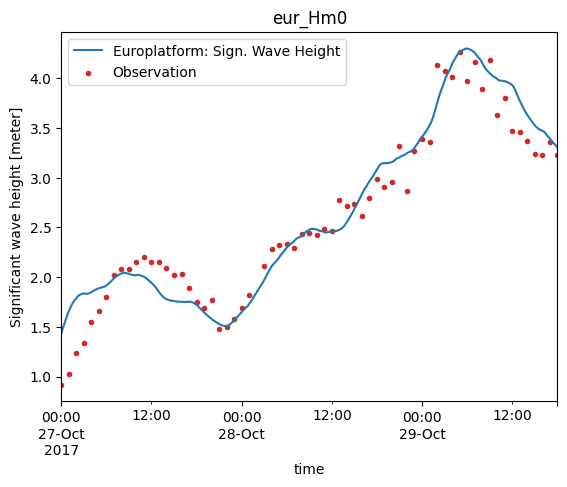

In [9]:
c[0].plot.timeseries()

## Systematic vs random errors

![](images/systematic_random_error.png)

A model is an simplified version of a natural system, such as the ocean, and as such does not reflect every detail of the natural system.

In order to validate if a model does capture the essential dynamics of the natural system, it can be helpful to classify the mismatch of the model and observations in two broad categories:
* systematic errors
* random errors

A quantitativate assesment of a model involves calculating one or more model score, skill metrics, which in varying degrees capture systematic errors, random errors or a combination.

## Metrics

**Bias** is an indication of systematic error. In the left figure above, the model has negative bias (modelled wave heights are lower thatn observed). Thus it is an indication that the model can be improved.

**Root Mean Square Error** (rmse) is a combination of systematic and random error. It is a common metric to indicate the quality of a calibrated model, but less useful to understand the potential for further calibration since it captures both systematic and random errors.

**Unbiased Root Mean Square Error** (urmse) is the unbiased version of Root Mean Square Error. Since the bias is removed, it only captures the random error.

For a complete list of possible metrics, see the [Metrics section in the FMSkill docs](https://dhi.github.io/fmskill/api.html#metrics).



To get a quantitative model skill, we use the .skill() method, which returns a table (similar to a DataFrame).

In [10]:
c.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
eur_Hm0,66,0.05321,0.229957,0.223717,0.177321,0.967972,0.086125,0.929005


The default is a number of common metrics, but you are free to pick your favorite metrics.

In [11]:
c.skill(metrics=["mae","rho","lin_slope"])

,n,mae,rho,lin_slope
observation,,,,
eur_Hm0,66,0.177321,0.970199,0.999428


A very common way to visualize model skill is to use a scatter plot.

The scatter plot includes some additional features such as a 2d histogram, a Q-Q line and a regression line, but the appearance is highly configurable.

<Axes: title={'center': 'Europlatform: Sign. Wave Height vs Observations'}, xlabel='Observation, Significant wave height [meter]', ylabel='Model, Significant wave height [meter]'>

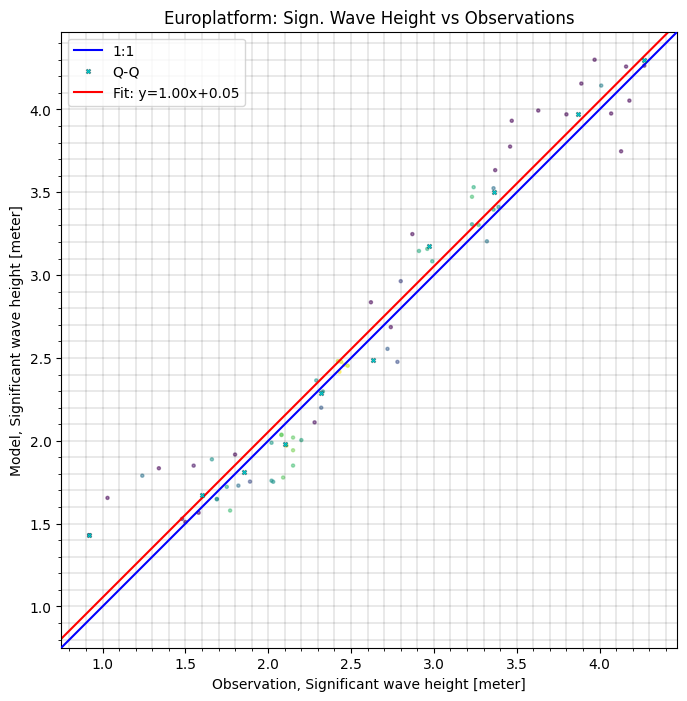

In [15]:
c.plot.scatter()

<Axes: title={'center': 'A calibrated model!'}, xlabel='Observation, Significant wave height [meter]', ylabel='Model, Significant wave height [meter]'>

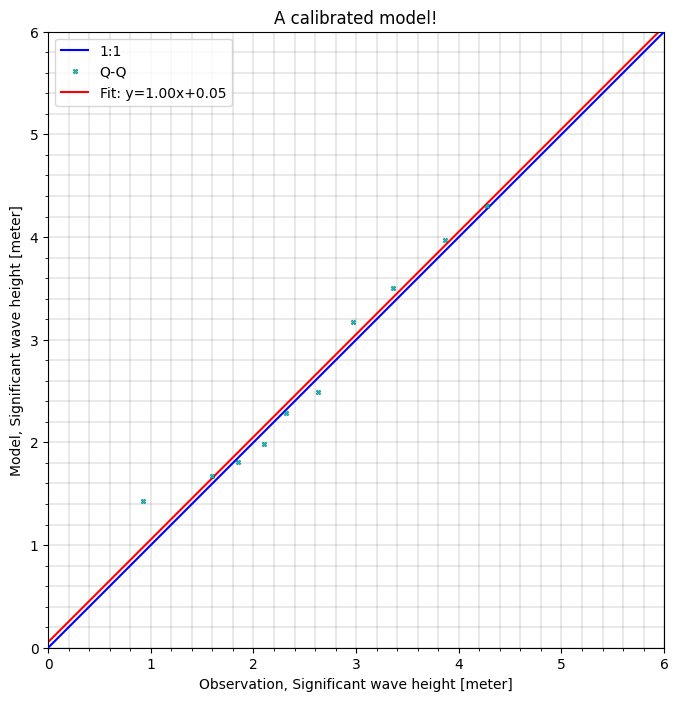

In [14]:
c.plot.scatter(binsize=0.5, 
          show_points=False,
          xlim=[0,6], ylim=[0,6],
          title="A calibrated model!")

## Taylor diagram

A taylor diagram is a way to combine several statistics in a single plot, and is very useful to compare the skill of several models, or observations in a single plot.

/home/jan/src/book-learn-mikeio-fmskill/.venv/lib/python3.10/site-packages/modelskill/comparison/_collection.py:720: FutureWarning: The provided callable <function sum at 0x7f3f803711b0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  res = skilldf.groupby(by).agg(agg)


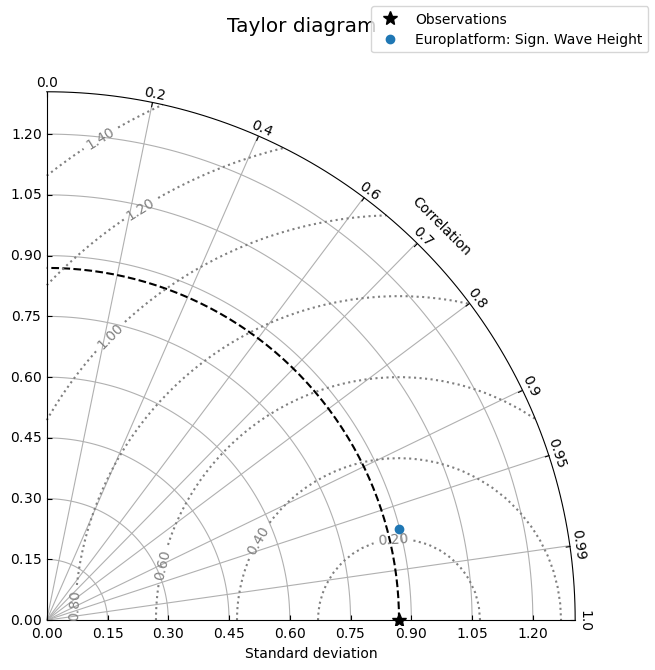

In [17]:
c.plot.taylor()

## Elaborate comparison

In [18]:
import numpy as np
from modelskill import PointObservation
from modelskill import ModelResult, Connector

In [20]:
fn = 'data/SW/HKZN_local_2017_DutchCoast.dfsu'
mr = ModelResult(fn, name='HKZN_local', item=0)
mr

<DfsuModelResult> 'HKZN_local'

In [21]:
o1 = PointObservation('data/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation("data/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")

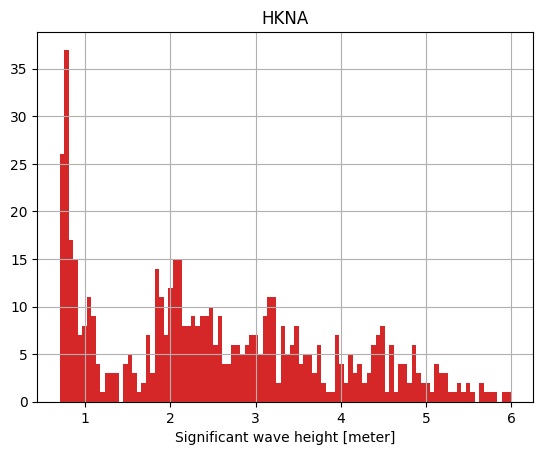

In [22]:
o1.hist();

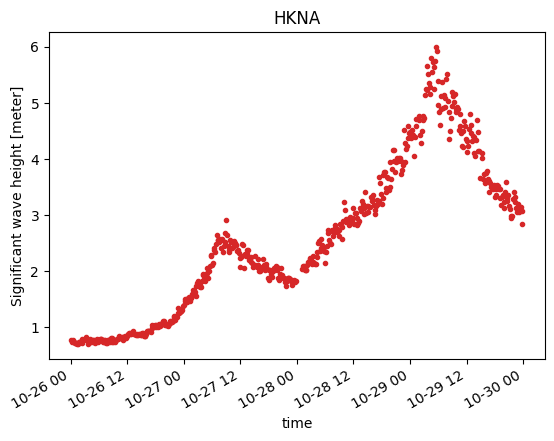

In [23]:
o1.plot(); 

### Connecting

In [24]:
con = Connector([o1, o2], mr)
con.observations

{'HKNA': PointObservation: HKNA, x=4.242, y=52.6887,
 'EPL': PointObservation: EPL, x=3.276, y=51.999}

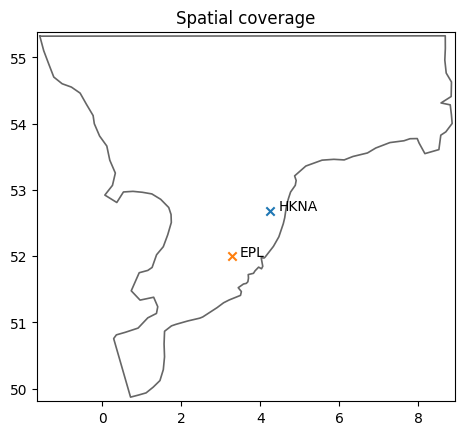

In [25]:
con.plot_observation_positions();

In [26]:
cc = con.extract()
cc

<ComparerCollection>
PointComparer: HKNA
PointComparer: EPL

In [27]:
cc.skill().style(precision=2)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
EPL,66,-0.07,0.22,0.22,0.19,0.97,0.08,0.93
HKNA,386,-0.19,0.35,0.29,0.25,0.97,0.09,0.91


In [28]:
cc["EPL"].skill(metrics="mean_absolute_error")

,n,mean_absolute_error
observation,,
EPL,66,0.189791


/home/jan/src/book-learn-mikeio-fmskill/.venv/lib/python3.10/site-packages/modelskill/comparison/_comparison.py:1290: FutureWarning: plot_timeseries is deprecated. Use plot.timeseries instead.
  warnings.warn(


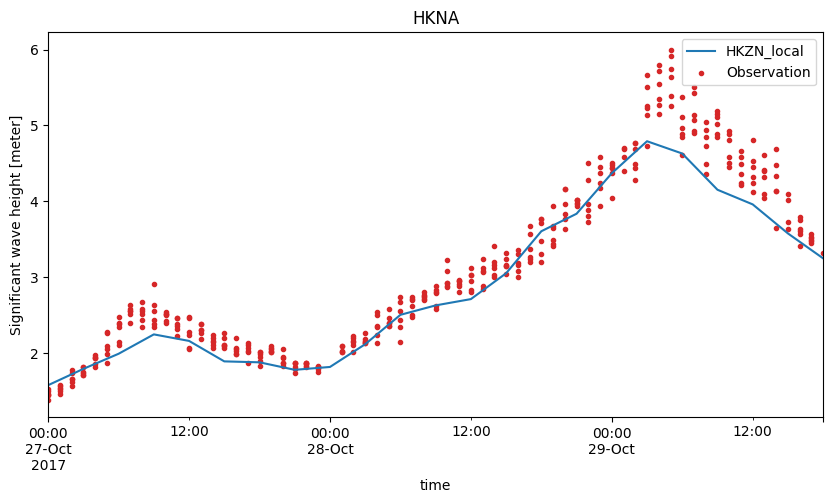

In [29]:
cc["HKNA"].plot_timeseries(figsize=(10,5));

/home/jan/src/book-learn-mikeio-fmskill/.venv/lib/python3.10/site-packages/modelskill/comparison/_comparison.py:1222: FutureWarning: This method is deprecated, use plot.scatter instead
  warnings.warn(


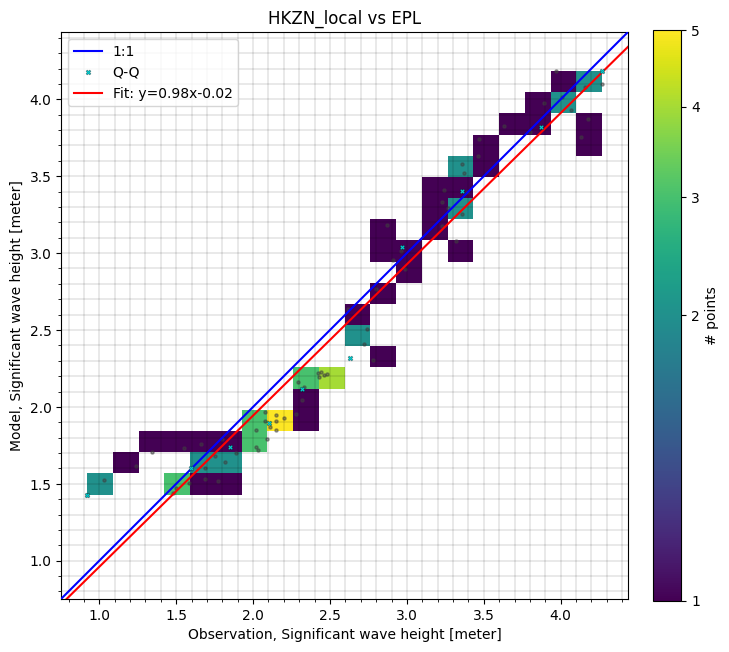

In [30]:
cc["EPL"].scatter(figsize=(8,8), show_hist=True) #, ylim=[2,8], xlim=[1,10])

/home/jan/src/book-learn-mikeio-fmskill/.venv/lib/python3.10/site-packages/modelskill/comparison/_comparison.py:1277: FutureWarning: hist is deprecated. Use plot.hist instead.
  warnings.warn("hist is deprecated. Use plot.hist instead.", FutureWarning)


<Axes: title={'center': 'HKZN_local vs EPL'}, xlabel='Significant wave height [meter]', ylabel='density'>

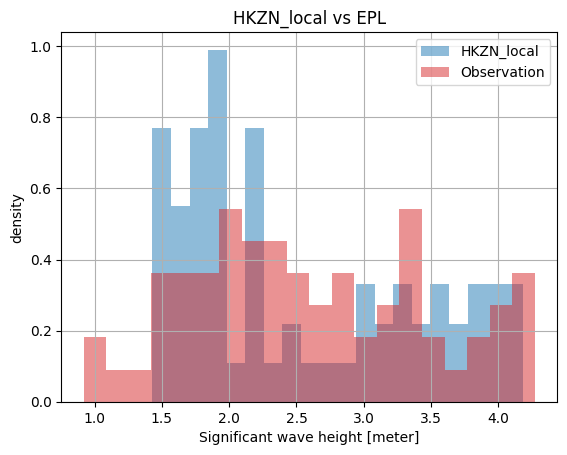

In [31]:
cc["EPL"].hist(bins=20)

<Axes: title={'center': 'HKZN_local vs HKNA'}, xlabel='Observation, Significant wave height [meter]', ylabel='Model, Significant wave height [meter]'>

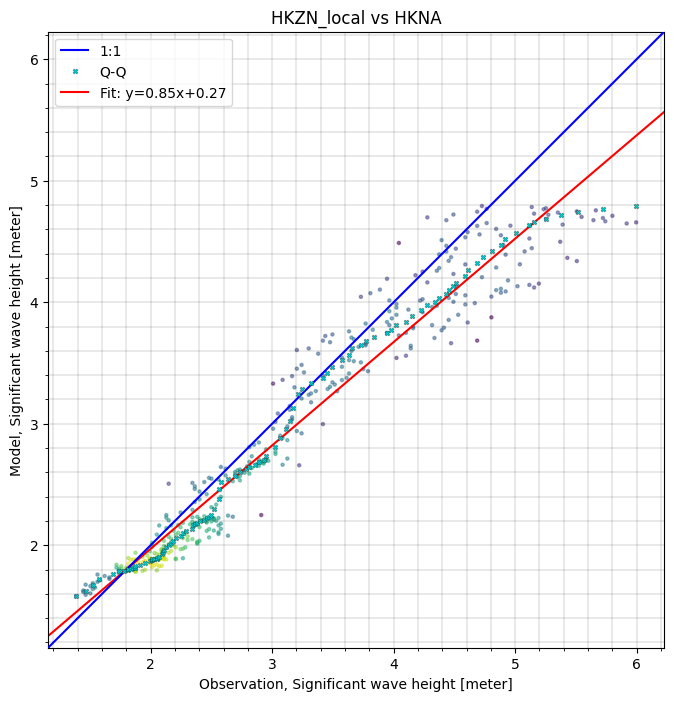

In [35]:
cc["HKNA"].plot.scatter()

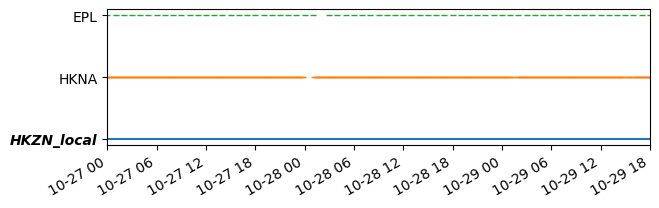

In [36]:
con.plot_temporal_coverage();